In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import gc
import tqdm
import collections
import re

In [2]:
#A simple hyperbolic tangent model for membrane footprint
# h_memb(r) = tanh(r*InitialSlope)
# The derivative is then given by
# h_memb'(r) = InitialSlope*sech(r*InitialSlope)**2
curveFun=lambda x,m0:np.tanh(x*m0)
dCurveFun=lambda x,m0:m0*np.cosh(x*m0)**(-2)

In [3]:
@interact
def plot_isect(dsep=widgets.FloatLogSlider(min=np.log(.0625),max=np.log(16))):
    xArr=np.linspace(0,dsep,101)
    fig,axs=plt.subplots(1,2)
    fig.set_figwidth(12)
    fig.set_figheight(7)
    colors=['red','orange','yellow','green','blue','purple','violet']
    for im0,m0 in enumerate(np.tan(np.array([5,15,30,45,60,75,85])*np.pi/180)):
        colorVal=colors[im0]
        c1=curveFun(xArr,m0)
        c2=curveFun(dsep-xArr,m0)
        ax=axs.flat[0]
        ax.plot(xArr,c1,
                color=colorVal,
                label='startAngle:%f'%(np.arctan(m0)*180./np.pi)
               )
        ax.plot(xArr,c2,
                color=colorVal,
                #label='startAngle:%f'%(np.arctan(m0)*180./np.pi)
               )
        ax.set_xlabel('position')
        ax.set_ylabel('height')
        ax.set_ylim(0,np.max([dsep,1.0]))
        ax.legend()
        
        dC1=dCurveFun(xArr,m0)
        dC2=-dCurveFun(dsep-xArr,m0)
        ax=axs.flat[1]
        ax.plot(xArr,np.arctan(dC1)*180./np.pi,
                color=colorVal,
                label='startAngle:%f'%(np.arctan(m0)*180./np.pi)
               )
        ax.plot(xArr,np.arctan(dC2)*180./np.pi,
                color=colorVal,
                #label='startAngle:%f'%(np.arctan(m0)*180./np.pi)
               )
        ax.set_xlabel('position')
        ax.set_ylabel('angle of inclination')
        ax.legend()
        
        plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(7,7))
    m0Arr=np.tan(np.linspace(1,89,10*89+1)*np.pi/180)

    dC1isect=dCurveFun(dsep/2,m0Arr)
    dC2isect=-dCurveFun(dsep/2,m0Arr)
    plt.plot(np.arctan(m0Arr)*180./np.pi,
            (np.pi-(2*np.arctan(dC1isect)))*180./np.pi,
           )
    plt.xlabel('initial angle of inclination')
    plt.ylabel('intersection angle')
    plt.show()

interactive(children=(FloatLogSlider(value=1.0, description='dsep', max=2.772588722239781, min=-2.772588722239…

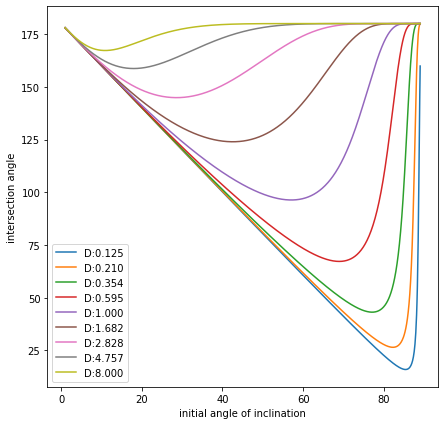

In [4]:
dsepList=np.exp(np.linspace(np.log(.125),np.log(8),9))
plt.figure(figsize=(7,7))
for dsep in dsepList:
    m0Arr=np.tan(np.linspace(1,89,10*89+1)*np.pi/180)

    dC1isect=dCurveFun(dsep/2,m0Arr)
    dC2isect=-dCurveFun(dsep/2,m0Arr)
    plt.plot(np.arctan(m0Arr)*180./np.pi,
             (np.pi-(2*np.arctan(dC1isect)))*180./np.pi,
             label='D:%.3f'%dsep
           )
plt.xlabel('initial angle of inclination')
plt.ylabel('intersection angle')
plt.legend()
plt.show()